In [110]:
# Necessary libraries
import pandas as pd
import numpy as np # for array calculations
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for data visualization
import warnings # for suppressing warnings
warnings.filterwarnings('ignore') 

# set max_columns to None, to display all the columns of the dataframe
pd.options.display.max_columns = None

In [2]:
data = pd.read_csv('C:/claims_fraud_datasets/cleanedclaim_data.csv')
data.head()

,ClmAdmitDiagnosisCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_9,Admitted,Gender,RenalDiseaseIndicator,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,PotentialFraud,TotalClaimAmt,IPTotalAmt,OPTotalAmt,IsAlive,Age,ClaimSettlementDuration,NumUniquePhysician,NumPhysicianRole,SamePhysicianMultipleRole1,SamePhysicianMultipleRole2,PhysCode_PHY330576,PhysCode_PHY412132,PhysCode_PHY341578,PhysCode_PHY337425,ClaimDiagCode_4019,ClaimDiagCode_25000,ClaimDiagCode_2724,ClaimDiagCode_V5869,ClaimDiagCode_4011,ClaimDiagCode_42731,ClaimDiagCode_V5861,ClaimDiagCode_2720,ClaimDiagCode_2449,ClaimDiagCode_4280
0,1,1,1,1,1,1,1,0,1,0,1,0,0,1,1,1,0,1,1,1,27068.0,39204,130,1,67,6,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
1,0,1,1,1,1,0,1,0,1,1,1,0,0,0,0,1,0,0,0,1,50.0,26136,650,1,78,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1,1,1,1,1,1,0,0,1,1,1,0,1,0,0,1,0,0,0,1,20068.0,20068,120,1,96,12,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,18068.0,18068,1590,1,87,18,1,2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,1,1,1,1,0,1,0,0,0,1,0,0,1,0,1,1,1,1,0,1,14068.0,29136,610,1,80,4,3,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [3]:
# Checking if the dataset has duplicates
data.duplicated().any()

True

In [4]:
data.drop_duplicates(inplace=True)
data.shape

(555509, 44)

In [5]:
# Checking if the dataset still has duplicates
data.duplicated().any()

False

- No more duplicates

# Data Preprocessing

Checking the class imbalance

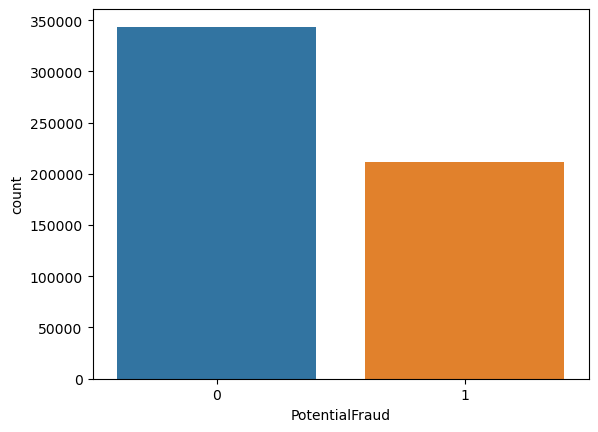

In [6]:
sns.countplot(x = 'PotentialFraud', data = data)
plt.show()

- As it can be observed in the count plot above, the target variable (PotentialFraud) is imbalanced.

In [7]:
# Proportion of the minority/positive (fraud) class
print('Proportion of minority/positive (fraud) class: '\
     + str(round(data[data['PotentialFraud'] == 1].shape[0]/data.shape[0]*100, 1)) + '%')

Proportion of minority/positive (fraud) class: 38.2%


Preprocessing the original dataset

In [8]:
# Feature selection
# Defining input and target data
x = data.drop('PotentialFraud', axis = 1) # input
y = data['PotentialFraud'].values # Converting target values into numpy array

In [9]:
# Splitting the original cleaned data into training (80%) and test (20%) sets
# stratify = y, so the class imbalance's properly replicated in the training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.2, 
                                                    random_state = 42,
                                                    stratify = y)

In [10]:
print('Proportion of minority/positive (fraud) class in training set: '\
    + str(round(y_train.sum()/len(y_train)*100, 1)) + '%')
print('Proportion of minority/positive (fraud) class in test set: '\
    + str(round(y_test.sum()/len(y_test)*100, 1)) + '%')

Proportion of minority/positive (fraud) class in training set: 38.2%
Proportion of minority/positive (fraud) class in test set: 38.2%


- The class imbalance is well replicated in the training and test sets

In [11]:
# Standardization to help avoid outliers and improve model performance
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Sampling - upsampling and undersampling are carried out to handle class imbalance to improve model efficiency.

In [12]:
# Up-sampling 
# Up-sampling the minority class. The majority class is kept as it is, while observations in the minority class are duplicated
# Importing resample library
from sklearn.utils import resample

# Defining majority and minority classes (fraud_0 = majority, fraud_1 = minority)
fraud_0 = data.loc[data['PotentialFraud'] == 0]
fraud_1 = data.loc[data['PotentialFraud'] == 1]

upsampled_1 = resample(fraud_1, 
                       replace = True, # sampling with replacement
                       n_samples = len(fraud_0), # matching number in majority class
                       random_state = 42) 

# Combine majority and upsampled minority
upsampled = pd.concat([fraud_0, upsampled_1], ignore_index = True)

# preprocessing the upsampled datase
x_ups = upsampled.drop(['PotentialFraud'], axis = 1)
y_ups = upsampled['PotentialFraud'].values # converting target values to numpy array

# splitting upsampled data into training and test sets
x_train_ups, x_test_ups, y_train_ups, y_test_ups = train_test_split(x_ups, y_ups, 
                                                                    test_size = 0.2, 
                                                                    random_state = 42,
                                                                    stratify = y_ups)

# Standardizing upsampled inputs
x_train_ups = scaler.fit_transform(x_train_ups)
x_test_ups = scaler.transform(x_test_ups)

In [13]:
# Under-sampling 
# Picking out some instances from the majority class until the required sampling ratio is achieved.
undsampled_0 = resample(fraud_0, 
                        replace = True, # sampling with replacement
                        n_samples = len(fraud_1), # matching number in minority class
                        random_state = 42) 

# Combine majority and undersampled minority
undsampled = pd.concat([undsampled_0, fraud_1], ignore_index = True)

# preprocessing the undersampled datase
x_und = undsampled.drop(['PotentialFraud'], axis = 1)
y_und = undsampled['PotentialFraud'].values # converting target values to numpy array

# splitting undersampled data into training and test sets
x_train_und, x_test_und, y_train_und, y_test_und = train_test_split(x_und, y_und, 
                                                                    test_size = 0.2, 
                                                                    random_state = 42,
                                                                    stratify = y_und)

# Standardizing undersampled inputs
x_train_und = scaler.fit_transform(x_train_und)
x_test_und = scaler.transform(x_test_und)

# Model Building, Training and Evaluation

In [14]:
# model1 = Logistic Regression model
# Importing necessary libraries
from sklearn.linear_model import LogisticRegression

# Creating and training Logistic Regression model
model1 = LogisticRegression()
model1.fit(x_train, y_train) # model training

# Model predictions on the test set
model1_pred = model1.predict(x_test)

Model evaluation:
- Accuracy metric is not a good evaluation metric when it comes to this health insurance claims fraud detection problem, because it only accounts for true positives (TP) and true negatives (TN), and does not look at what the model has not done correctly. It only looks at what the model has done correctly.
- Precision and Recall are better because they take into account what the model has not done correctly.

Precision - represents the number of predicted positives that are actually positive. Takes into account the number of records that the model incorrectly tagged.
- = TP/(TP + FP)

Recall - represents the number of positives that are correctly predicted, out of the total number of positives. Takes into account the number of records that the model failed to tag at all.
- = TP/(TP + FN)

F1-Score - represents a moderate balance between precision and recall, considering both false positives and false negatives. Optimizing the F1-Score can help achieve an optimal model.
- = (2 * Precision * Recall)/ (Precision + Recall)

model1 accuracy on train set: 64.3%
model1 accuracy on test set: 64.3%


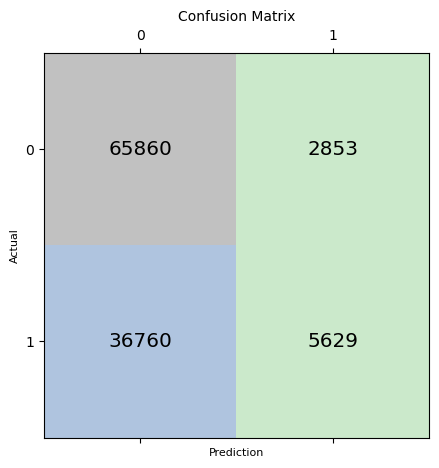

In [15]:
# Logistic regression (model1) model evaluation
# Checking the Model Accuracy and comparing it to Precision, Recall and F1_Score
# Importing necessary libraries
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

print('model1 accuracy on train set: {:.1f}%'.format(round(accuracy_score(y_train, model1.predict(x_train))*100, 1)))
print('model1 accuracy on test set: {:.1f}%'.format(round(accuracy_score(y_test, model1_pred)*100, 1)))

# Confusion matrix
conf_matrix = confusion_matrix(y_true = y_test, y_pred = model1_pred)
fig, ax = plt.subplots(figsize = (5, 5))
ax.matshow(conf_matrix, cmap = plt.cm.Accent, alpha = 0.4)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x = j, y = i, s = conf_matrix[i, j],
                va = 'center', ha = 'center', size = 'x-large')

plt.xlabel('Prediction', fontsize = 8)
plt.ylabel('Actual', fontsize = 8)
plt.title('Confusion Matrix', fontsize = 10)
plt.show()

- The intersection of minority (positive) class prediction (1, 1) represents how well the model is performing.
- Out of 42389 minority class records, only 5629 are predicted correctly. 2853 of 68713 majority (negative) class records are predicted incorrectly. That's not a great performance by the model.

In [16]:
# Precision, Recall and F1-Score
Precision = round(precision_score(y_test, model1_pred), 2)
Recall = round(recall_score(y_test, model1_pred), 2)
F1_Score = round(f1_score(y_test, model1_pred), 2)
Metrics = [Precision, Recall, F1_Score]

Original = pd.DataFrame(Metrics)
Original.index = ['Precision', 'Recall', 'F1-Score']
Original.columns = ['Original Dataset']
Original

,Original Dataset
Precision,0.66
Recall,0.13
F1-Score,0.22


- Only 13% of the potentially fraudulent insurance claims are detected by the model. This implies that the model misses a significant number of actual positive (fraudulent) cases.
- Out of all the positive (fraudulent) predictions, only 66% are actually positive (fraudulent). This implies that the model is only correct about 66% of the time when detecting positive (fraudulent) cases.
- Therefore, the model needs improvement, especially in capturing more true positive (fraudulent) cases. This is because the model's efficiency depends on the model being able to detect the positive class correctly, i.e, detecting how more likely an insurance claim is fraudulent than not fraudulent.

Improving the Logistic Regression Model's efficiency

1. Changing the prediction threshold
- Iterating over a series of values ranging from 0.1 to 0.75 to identify the threshold which performs the best.

In [17]:
cols = ['Metrics', 'Original']
adj_threshold = pd.DataFrame()
adj_threshold['Original'] = Metrics
thresholds = [j/20 for j in range(1, 16)]
for i in thresholds:
    model1_new_threshold = (model1.predict_proba(x_test)[:, 1] >= i).astype(int)
    Precision_adj_threshold = round(precision_score(y_test, model1_new_threshold, average = 'binary'), 2)
    Recall_adj_threshold = round(recall_score(y_test, model1_new_threshold, average = 'binary'), 2)
    F1_SCore_adj_threshold = round(f1_score(y_test, model1_new_threshold, average = 'binary'), 2)
    Metrics_adj_threshold = [Precision_adj_threshold, Recall_adj_threshold, F1_SCore_adj_threshold]
    name = 'Threshold:' + str(i)
    adj_threshold[name] = Metrics_adj_threshold
    cols.append(name)

adj_threshold.index = ['Precision', 'Recall', 'F1-Score']
adj_threshold = adj_threshold.reset_index()
adj_threshold.columns = cols
adj_threshold.transpose()

adj_threshold1 = adj_threshold.transpose().iloc[1:, :]
adj_threshold1.columns = adj_threshold.iloc[:, 0]
adj_threshold1

Metrics,Precision,Recall,F1-Score
Original,0.66,0.13,0.22
Threshold:0.05,0.38,1.0,0.55
Threshold:0.1,0.38,1.0,0.55
Threshold:0.15,0.38,1.0,0.55
Threshold:0.2,0.38,1.0,0.55
Threshold:0.25,0.39,0.99,0.55
Threshold:0.3,0.41,0.86,0.56
Threshold:0.35,0.41,0.83,0.55
Threshold:0.4,0.5,0.38,0.43
Threshold:0.45,0.62,0.17,0.27


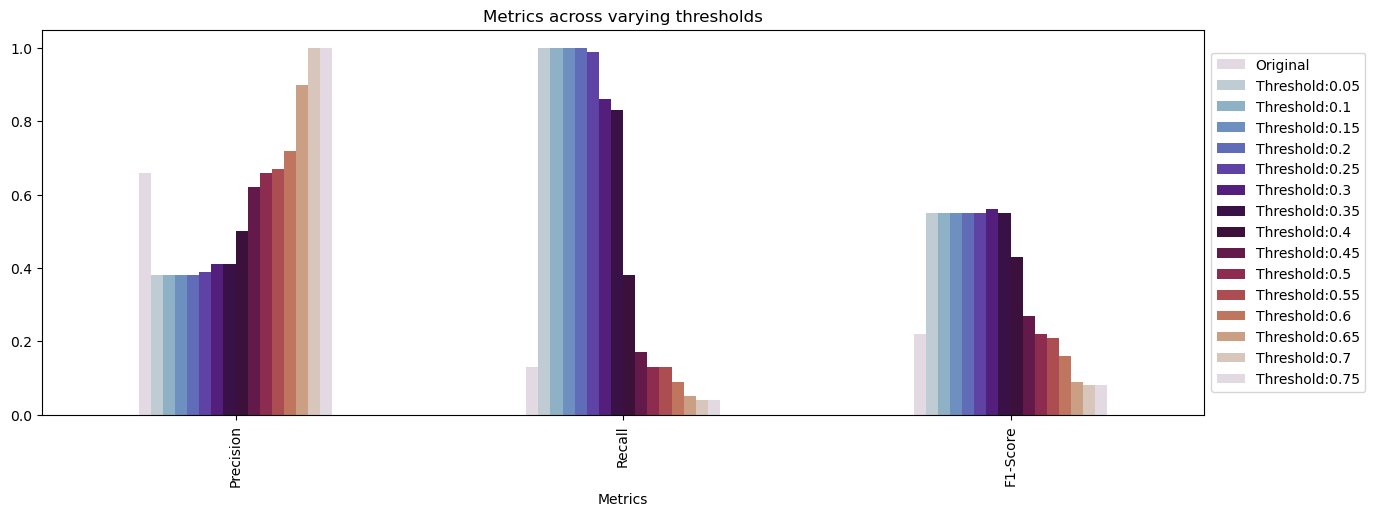

In [18]:
# Plotting the metrics
adj_threshold.plot(x = 'Metrics',
                   kind = 'bar',
                   stacked = False,
                   title = 'Metrics across varying thresholds',
                   figsize = (15, 5),
                   cmap = 'twilight').legend(loc = 'center left', bbox_to_anchor = (1.0, 0.5))

- Working with an optimal F1-Score is the most preferred approach, since precision and recall cannot be simultaneously optimized as one can increase the granularity of the thresholds to determine the optimal one.
- Optimal F1-Score in this case is at threshold of 0.3.

New model prediction with optimal threshold

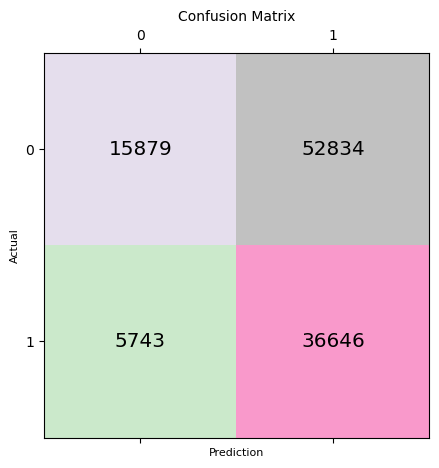

In [19]:
# Model prediction with threshold at 0.3
model1_pred_new_threshold = (model1.predict_proba(x_test)[:, 1] >= 0.3).astype(int)

# Confusion matrix
conf_matrix = confusion_matrix(y_true = y_test, y_pred = model1_pred_new_threshold)
fig, ax = plt.subplots(figsize = (5, 5))
ax.matshow(conf_matrix, cmap = plt.cm.Accent, alpha = 0.4)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x = j, y = i, s = conf_matrix[i, j],
                va = 'center', ha = 'center', size = 'x-large')

plt.xlabel('Prediction', fontsize = 8)
plt.ylabel('Actual', fontsize = 8)
plt.title('Confusion Matrix', fontsize = 10)
plt.show()

- The confusion matrix looks better this time. Out of 42389 minority class records, 36646 are predicted correctly this time. The model has improved in capturing more true positives.

In [20]:
# Precision, Recall and F1-Score of new model1 prediction with optimal threshold
Precision_newthreshold = round(precision_score(y_test, model1_pred_new_threshold), 2)
Recall_newthreshold = round(recall_score(y_test, model1_pred_new_threshold), 2)
F1_Score_newthreshold = round(f1_score(y_test, model1_pred_new_threshold), 2)
Metrics_newthreshold = [Precision_newthreshold, Recall_newthreshold, F1_Score_newthreshold]

newthreshold = pd.DataFrame(list(zip(Metrics, Metrics_newthreshold)))
newthreshold.index = ['Precision', 'Recall', 'F1-Score']
newthreshold.columns = ['Original Dataset', 'New Threshold Dataset']
newthreshold

,Original Dataset,New Threshold Dataset
Precision,0.66,0.41
Recall,0.13,0.86
F1-Score,0.22,0.56


Up-sampling

In [21]:
# Model1 training on upsampled data
model1_ups = LogisticRegression()
model1_ups.fit(x_train_ups, y_train_ups) # model1 training

# Model1 predictions on the test set
model1_ups_pred = model1_ups.predict(x_test_ups)

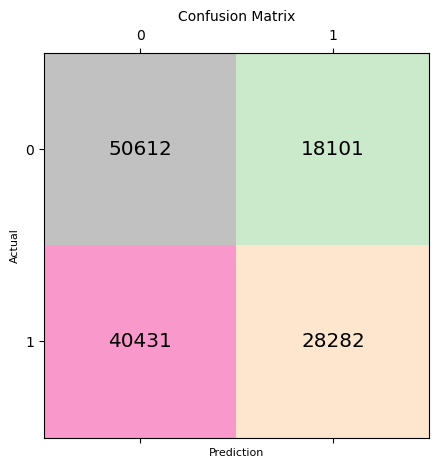

In [22]:
# Confusion matrix
conf_matrix = confusion_matrix(y_true = y_test_ups, y_pred = model1_ups_pred)
fig, ax = plt.subplots(figsize = (5, 5))
ax.matshow(conf_matrix, cmap = plt.cm.Accent, alpha = 0.4)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x = j, y = i, s = conf_matrix[i, j],
                va = 'center', ha = 'center', size = 'x-large')

plt.xlabel('Prediction', fontsize = 8)
plt.ylabel('Actual', fontsize = 8)
plt.title('Confusion Matrix', fontsize = 10)
plt.show()

In [23]:
# Model1 Precision, Recall and F1-Score on upsampled data
Precision_ups = round(precision_score(y_test_ups, model1_ups_pred), 2)
Recall_ups = round(recall_score(y_test_ups, model1_ups_pred), 2)
F1_Score_ups = round(f1_score(y_test_ups, model1_ups_pred), 2)
Metrics_ups = [Precision_ups, Recall_ups, F1_Score_ups]

up_sampled = pd.DataFrame(list(zip(Metrics, Metrics_newthreshold, Metrics_ups)))
up_sampled.index = ['Precision', 'Recall', 'F1-Score']
up_sampled.columns = ['Original Dataset', 'Threshold = 0.3', 'Up-sampled Dataset']
up_sampled


,Original Dataset,Threshold = 0.3,Up-sampled Dataset
Precision,0.66,0.41,0.61
Recall,0.13,0.86,0.41
F1-Score,0.22,0.56,0.49


Under-sampling

In [24]:
# Model1 training on undersampled data
model1_down = LogisticRegression()
model1_down.fit(x_train_und, y_train_und) # model training

# Model1 predictions on the test set
model1_down_pred = model1_down.predict(x_test_und)

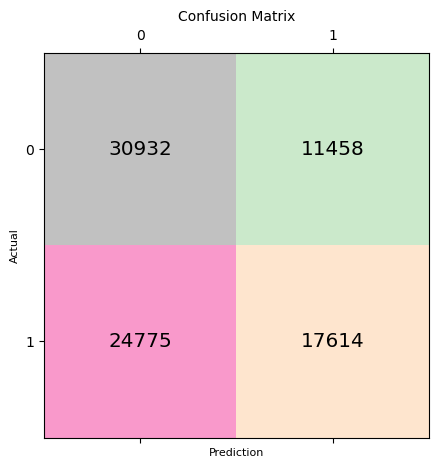

In [25]:
# Confusion matrix
conf_matrix = confusion_matrix(y_true = y_test_und, y_pred = model1_down_pred)
fig, ax = plt.subplots(figsize = (5, 5))
ax.matshow(conf_matrix, cmap = plt.cm.Accent, alpha = 0.4)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x = j, y = i, s = conf_matrix[i, j],
                va = 'center', ha = 'center', size = 'x-large')

plt.xlabel('Prediction', fontsize = 8)
plt.ylabel('Actual', fontsize = 8)
plt.title('Confusion Matrix', fontsize = 10)
plt.show()

In [26]:
# Model1 Precision, Recall and F1-Score on downsampled data
Precision_down = round(precision_score(y_test_und, model1_down_pred), 2)
Recall_down = round(recall_score(y_test_und, model1_down_pred), 2)
F1_Score_down = round(f1_score(y_test_und, model1_down_pred), 2)
Metrics_down = [Precision_down, Recall_down, F1_Score_down]

down_sampled = pd.DataFrame(list(zip(Metrics, Metrics_newthreshold, Metrics_ups, Metrics_down)))
down_sampled.index = ['Precision', 'Recall', 'F1-Score']
down_sampled.columns = ['Original Dataset', 'Threshold = 0.3', 'Up-sampled Dataset', 'Down-sampled Dataset']
down_sampled

,Original Dataset,Threshold = 0.3,Up-sampled Dataset,Down-sampled Dataset
Precision,0.66,0.41,0.61,0.61
Recall,0.13,0.86,0.41,0.42
F1-Score,0.22,0.56,0.49,0.49


- Logistic Regression model gives a better performance when the prediction threshold is set at 0.3. It has the highest recall (86%) at threshold = 0.3, implying that 86% of the potentially fraudulent health insurance claims are detected by the model.

In [27]:
# model2 - Random Forest Classifier
# Importing RandomForestClassifier library
from sklearn.ensemble import RandomForestClassifier

# Creating and training the Random Forest model
# n_estimators set at 70
model2 = RandomForestClassifier(
    criterion = 'entropy',
    max_depth = 4,
    max_features = 'sqrt',
    min_samples_leaf = 1,
    min_samples_split = 3,
    n_estimators = 70
)
model2.fit(x_train, y_train)  # model2 training

# Model2 predictions on the test set
model2_pred = model2.predict(x_test)

model1 accuracy on train set: 64.2%
model1 accuracy on test set: 64.3%


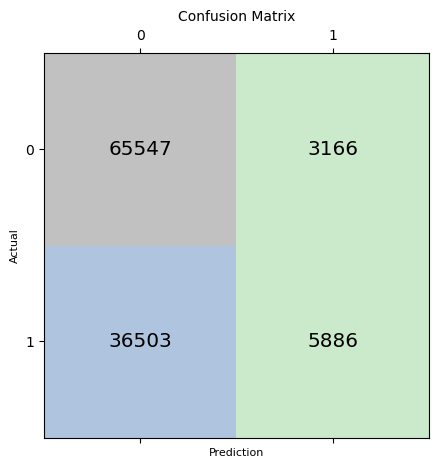

In [28]:
# Random Forest Classifier (model2) evaluation
# Checking the Model Accuracy and comparing it to Precision, Recall and F1_Score
print('model1 accuracy on train set: {:.1f}%'.format(round(accuracy_score(y_train, model2.predict(x_train))*100, 1)))
print('model1 accuracy on test set: {:.1f}%'.format(round(accuracy_score(y_test, model2_pred)*100, 1)))

# Confusion matrix
conf_matrix = confusion_matrix(y_true = y_test, y_pred = model2_pred)
fig, ax = plt.subplots(figsize = (5, 5))
ax.matshow(conf_matrix, cmap = plt.cm.Accent, alpha = 0.4)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x = j, y = i, s = conf_matrix[i, j],
                va = 'center', ha = 'center', size = 'x-large')

plt.xlabel('Prediction', fontsize = 8)
plt.ylabel('Actual', fontsize = 8)
plt.title('Confusion Matrix', fontsize = 10)
plt.show()

- Out of 42389 minority (positive) class records, only 5886 are predicted correctly. That's not a great performance by the model.

In [29]:
# Precision, Recall and F1-Score of Random Forest Classifier
Precision_2 = round(precision_score(y_test, model2_pred), 2)
Recall_2 = round(recall_score(y_test, model2_pred), 2)
F1_Score_2 = round(f1_score(y_test, model2_pred), 2)
Metrics_2 = [Precision_2, Recall_2, F1_Score_2]

Original_2 = pd.DataFrame(Metrics_2)
Original_2.index = ['Precision', 'Recall', 'F1-Score']
Original_2.columns = ['Original Dataset']
Original_2

,Original Dataset
Precision,0.65
Recall,0.14
F1-Score,0.23


- Only 14% of the potentially fraudulent insurance claims are detected by the Random Forest Classifier. This implies that the model misses a significant number of actual positive (fraudulent) cases.
- Out of all the positive (fraudulent) predictions, only 65% are actually positive (fraudulent). This implies that the model is only correct about 65% of the time when detecting positive (fraudulent) cases.

Improving the Random Forest Classifier efficiency

Changing the prediction threshold
- Iterating over a series of values ranging from 0.1 to 0.75 to identify the threshold which performs the best.

In [30]:
cols = ['Metrics', 'Original']
model2_adj_threshold = pd.DataFrame()
model2_adj_threshold['Original'] = Metrics_2
thresholds = [j/20 for j in range(1, 16)]
for i in thresholds:
    model2_new_threshold = (model2.predict_proba(x_test)[:, 1] >= i).astype(int)
    Precision_2_adj_threshold = round(precision_score(y_test, model2_new_threshold, average = 'binary'), 2)
    Recall_2_adj_threshold = round(recall_score(y_test, model2_new_threshold, average = 'binary'), 2)
    F1_SCore_2_adj_threshold = round(f1_score(y_test, model2_new_threshold, average = 'binary'), 2)
    Metrics_2_adj_threshold = [Precision_2_adj_threshold, Recall_2_adj_threshold, F1_SCore_2_adj_threshold]
    name = 'Threshold:' + str(i)
    model2_adj_threshold[name] = Metrics_2_adj_threshold
    cols.append(name)

model2_adj_threshold.index = ['Precision', 'Recall', 'F1-Score']
model2_adj_threshold = model2_adj_threshold.reset_index()
model2_adj_threshold.columns = cols
model2_adj_threshold.transpose()

adj_threshold2 = model2_adj_threshold.transpose().iloc[1:, :]
adj_threshold2.columns = model2_adj_threshold.iloc[:, 0]
adj_threshold2

Metrics,Precision,Recall,F1-Score
Original,0.65,0.14,0.23
Threshold:0.05,0.38,1.0,0.55
Threshold:0.1,0.38,1.0,0.55
Threshold:0.15,0.38,1.0,0.55
Threshold:0.2,0.38,1.0,0.55
Threshold:0.25,0.38,1.0,0.55
Threshold:0.3,0.38,1.0,0.55
Threshold:0.35,0.41,0.86,0.56
Threshold:0.4,0.49,0.42,0.45
Threshold:0.45,0.65,0.15,0.24


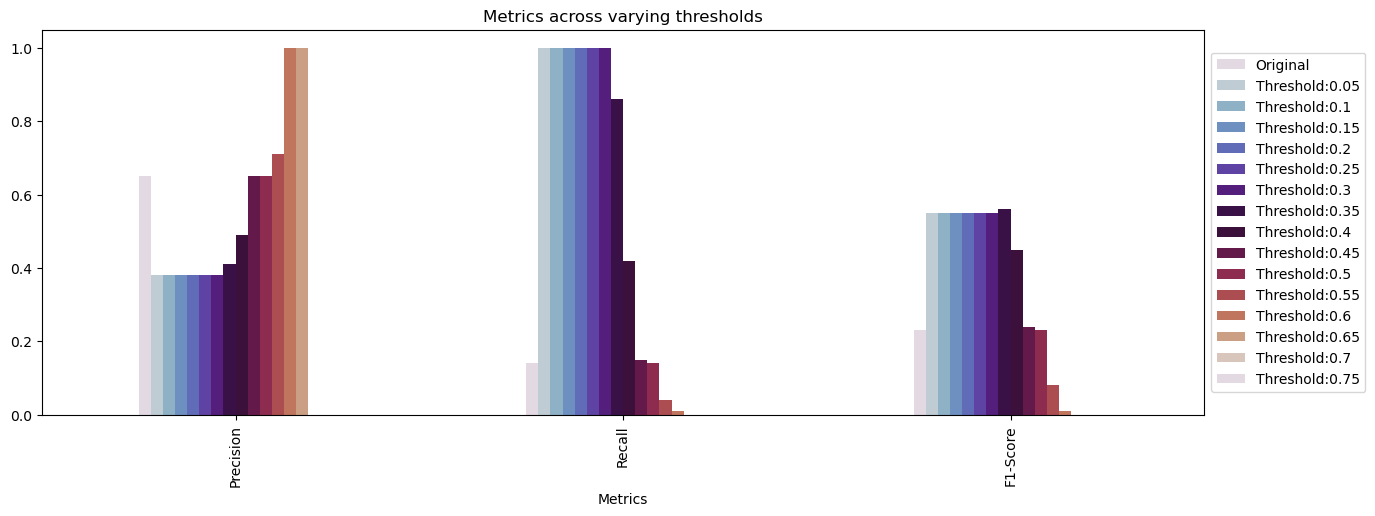

In [31]:
# Plotting the metrics
model2_adj_threshold.plot(x = 'Metrics',
                          kind = 'bar',
                          stacked = False,
                          title = 'Metrics across varying thresholds',
                          figsize = (15, 5),
                          cmap = 'twilight').legend(loc = 'center left', bbox_to_anchor = (1.0, 0.5))

- Working with optimal F1-Score with threshold at 0.35

New Random Forest Classifier with optimal threshold

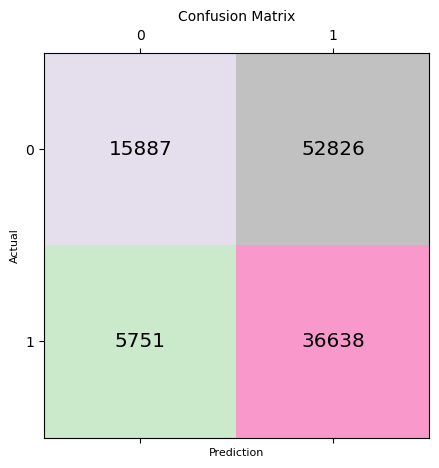

In [32]:
# Model prediction with threshold at 0.35
model2_pred_new_threshold = (model2.predict_proba(x_test)[:, 1] >= 0.35).astype(int)

# Confusion matrix
conf_matrix = confusion_matrix(y_true = y_test, y_pred = model2_pred_new_threshold)
fig, ax = plt.subplots(figsize = (5, 5))
ax.matshow(conf_matrix, cmap = plt.cm.Accent, alpha = 0.4)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x = j, y = i, s = conf_matrix[i, j],
                va = 'center', ha = 'center', size = 'x-large')

plt.xlabel('Prediction', fontsize = 8)
plt.ylabel('Actual', fontsize = 8)
plt.title('Confusion Matrix', fontsize = 10)
plt.show()

- The model has improved in capturing more true positives as it can be observed in the confusion matrix above. Out of the 42389 minority class records, 36638 are predicted correctly this time. 

In [33]:
# Precision, Recall and F1-Score of new model prediction with optimal threshold
Precision_2_newthreshold = round(precision_score(y_test, model2_pred_new_threshold), 2)
Recall_2_newthreshold = round(recall_score(y_test, model2_pred_new_threshold), 2)
F1_Score_2_newthreshold = round(f1_score(y_test, model2_pred_new_threshold), 2)
Metrics_2_newthreshold = [Precision_2_newthreshold, Recall_2_newthreshold, F1_Score_2_newthreshold]

model2_newthreshold = pd.DataFrame(list(zip(Metrics_2, Metrics_2_newthreshold)))
model2_newthreshold.index = ['Precision', 'Recall', 'F1-Score']
model2_newthreshold.columns = ['Original Dataset', 'New Threshold Dataset']
model2_newthreshold

,Original Dataset,New Threshold Dataset
Precision,0.65,0.41
Recall,0.14,0.86
F1-Score,0.23,0.56


Over-sampling

In [34]:
# Model2 training on upsampled data
# Creating and training the Random Forest model
model2_ups = RandomForestClassifier(
    criterion = 'entropy',
    max_depth = 4,
    max_features = 'sqrt',
    min_samples_leaf = 1,
    min_samples_split = 3,
    n_estimators = 70
)
model2_ups.fit(x_train_ups, y_train_ups) # model training

# Model predictions on the test set
model2_ups_pred = model2_ups.predict(x_test_ups)

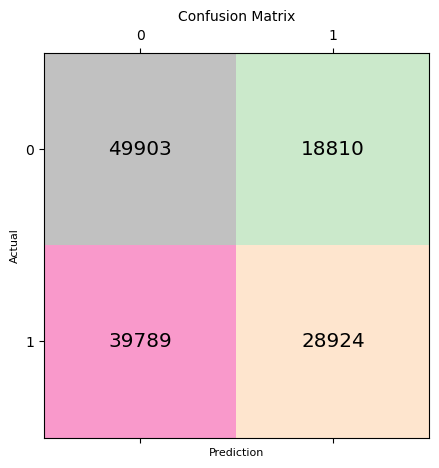

In [35]:
# Confusion matrix
conf_matrix = confusion_matrix(y_true = y_test_ups, y_pred = model2_ups_pred)
fig, ax = plt.subplots(figsize = (5, 5))
ax.matshow(conf_matrix, cmap = plt.cm.Accent, alpha = 0.4)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x = j, y = i, s = conf_matrix[i, j],
                va = 'center', ha = 'center', size = 'x-large')

plt.xlabel('Prediction', fontsize = 8)
plt.ylabel('Actual', fontsize = 8)
plt.title('Confusion Matrix', fontsize = 10)
plt.show()

In [36]:
# Model2 Precision, Recall and F1-Score on upsampled data
Precision_2_ups = round(precision_score(y_test_ups, model2_ups_pred), 2)
Recall_2_ups = round(recall_score(y_test_ups, model2_ups_pred), 2)
F1_Score_2_ups = round(f1_score(y_test_ups, model2_ups_pred), 2)
Metrics_2_ups = [Precision_2_ups, Recall_2_ups, F1_Score_2_ups]

up_sampled_2 = pd.DataFrame(list(zip(Metrics_2, Metrics_2_newthreshold,Metrics_2_ups)))
up_sampled_2.index = ['Precision', 'Recall', 'F1-Score']
up_sampled_2.columns = ['Original Dataset', 'Threshold = 0.3','Up-sampled Dataset']
up_sampled_2

,Original Dataset,Threshold = 0.3,Up-sampled Dataset
Precision,0.65,0.41,0.61
Recall,0.14,0.86,0.42
F1-Score,0.23,0.56,0.50


Under-sampling

In [37]:
# Model training on downsampled data
# Creating and training the Random Forest model
model2_down = RandomForestClassifier(
    criterion = 'entropy',
    max_depth = 4,
    max_features = 'sqrt',
    min_samples_leaf = 1,
    min_samples_split = 3,
    n_estimators = 70
)
model2_down.fit(x_train_und, y_train_und) # model training

# Model predictions on the test set
model2_down_pred = model2_down.predict(x_test_und)

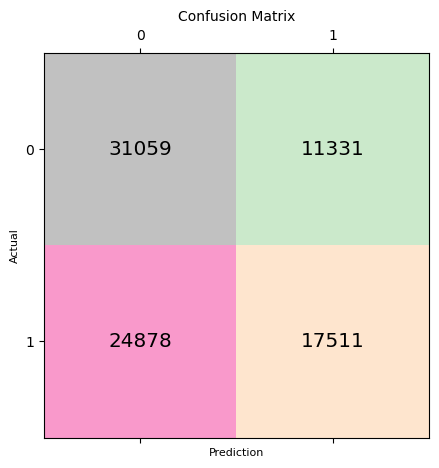

In [38]:
# Confusion matrix
conf_matrix = confusion_matrix(y_true = y_test_und, y_pred = model2_down_pred)
fig, ax = plt.subplots(figsize = (5, 5))
ax.matshow(conf_matrix, cmap = plt.cm.Accent, alpha = 0.4)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x = j, y = i, s = conf_matrix[i, j],
                va = 'center', ha = 'center', size = 'x-large')

plt.xlabel('Prediction', fontsize = 8)
plt.ylabel('Actual', fontsize = 8)
plt.title('Confusion Matrix', fontsize = 10)
plt.show()

In [39]:
# Model2 Precision, Recall and F1-Score on downsampled data
Precision_2_down = round(precision_score(y_test_und, model2_down_pred), 2)
Recall_2_down = round(recall_score(y_test_und, model2_down_pred), 2)
F1_Score_2_down = round(f1_score(y_test_und, model2_down_pred), 2)
Metrics_2_down = [Precision_2_down, Recall_2_down, F1_Score_2_down]

down_sampled_2 = pd.DataFrame(list(zip(Metrics_2, Metrics_2_newthreshold,Metrics_2_ups, Metrics_2_down)))
down_sampled_2.index = ['Precision', 'Recall', 'F1-Score']
down_sampled_2.columns = ['Original Dataset', 'Threshold = 0.3','Up-sampled Dataset', 'Under-sampled Dataset']
down_sampled_2

,Original Dataset,Threshold = 0.3,Up-sampled Dataset,Under-sampled Dataset
Precision,0.65,0.41,0.61,0.61
Recall,0.14,0.86,0.42,0.41
F1-Score,0.23,0.56,0.50,0.49


In [40]:
# model3 - Decision Tree Classifier
# Importing DecisionTreeClassifier library
from sklearn.tree import DecisionTreeClassifier

# Build GaussianNB classifier
model3 = DecisionTreeClassifier(max_leaf_nodes = 5)

model3.fit(x_train, y_train) # model training

# Model predictions on the test set
model3_pred = model3.predict(x_test)

model3 accuracy on train set: 63.5%
model3 accuracy on test set: 63.5%


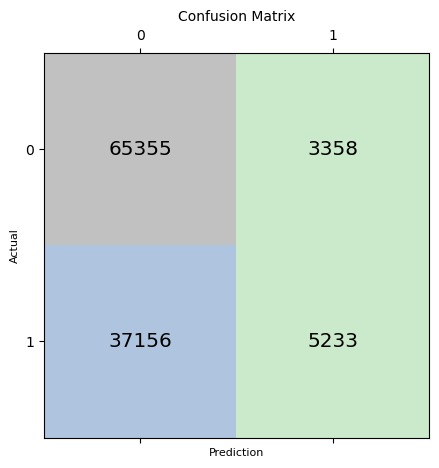

In [41]:
# Support Vector Classifier (model3) evaluation
# Checking the Model Accuracy and comparing it to Precision, Recall and F1_Score

print('model3 accuracy on train set: {:.1f}%'.format(round(accuracy_score(y_train, model3.predict(x_train))*100, 1)))
print('model3 accuracy on test set: {:.1f}%'.format(round(accuracy_score(y_test, model3_pred)*100, 1)))

# Confusion matrix
conf_matrix = confusion_matrix(y_true = y_test, y_pred = model3_pred)
fig, ax = plt.subplots(figsize = (5, 5))
ax.matshow(conf_matrix, cmap = plt.cm.Accent, alpha = 0.4)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x = j, y = i, s = conf_matrix[i, j],
                va = 'center', ha = 'center', size = 'x-large')

plt.xlabel('Prediction', fontsize = 8)
plt.ylabel('Actual', fontsize = 8)
plt.title('Confusion Matrix', fontsize = 10)
plt.show()

- Out of 42389 minority (positive) class records, only 5233 are predicted correctly. That's not a great performance by the model.

In [42]:
# Precision, Recall and F1-Score of Naive Bayes Classifier
Precision_3 = round(precision_score(y_test, model3_pred), 2)
Recall_3 = round(recall_score(y_test, model3_pred), 2)
F1_Score_3 = round(f1_score(y_test, model3_pred), 2)
Metrics_3 = [Precision_3, Recall_3, F1_Score_3]

Original_3 = pd.DataFrame(Metrics_3)
Original_3.index = ['Precision', 'Recall', 'F1-Score']
Original_3.columns = ['Original Dataset']
Original_3

,Original Dataset
Precision,0.61
Recall,0.12
F1-Score,0.21


- Only 5% 5of the potentially fraudulent insurance claims are detected by the Decision Tree Classifier. This implies that the model misses a significant number of actual positive (fraudulent) cases.
- Out of all the positive (fraudulent) predictions, only 61% are actually positive (fraudulent). This implies that the model is correct about 61% of the time when detecting positive (fraudulent) cases.

Improving Naive Bayes model's efficiency

Changing the prediction threshold
- Iterating over a series of values ranging from 0.1 to 0.75 to identify the threshold which performs the best.

In [43]:
cols = ['Metrics', 'Original']
model3_adj_threshold = pd.DataFrame()
model3_adj_threshold['Original'] = Metrics_3
thresholds = [j/20 for j in range(1, 16)]
for i in thresholds:
    model3_new_threshold = (model3.predict_proba(x_test)[:, 1] >= i).astype(int)
    Precision_3_adj_threshold = round(precision_score(y_test, model3_new_threshold, average = 'binary'), 2)
    Recall_3_adj_threshold = round(recall_score(y_test, model3_new_threshold, average = 'binary'), 2)
    F1_SCore_3_adj_threshold = round(f1_score(y_test, model3_new_threshold, average = 'binary'), 2)
    Metrics_3_adj_threshold = [Precision_3_adj_threshold, Recall_3_adj_threshold, F1_SCore_3_adj_threshold]
    name = 'Threshold:' + str(i)
    model3_adj_threshold[name] = Metrics_3_adj_threshold
    cols.append(name)

model3_adj_threshold.index = ['Precision', 'Recall', 'F1-Score']
model3_adj_threshold = model3_adj_threshold.reset_index()
model3_adj_threshold.columns = cols
model3_adj_threshold.transpose()

adj_threshold3 = model3_adj_threshold.transpose().iloc[1:, :]
adj_threshold3.columns = model3_adj_threshold.iloc[:, 0]
adj_threshold3

Metrics,Precision,Recall,F1-Score
Original,0.61,0.12,0.21
Threshold:0.05,0.38,1.0,0.55
Threshold:0.1,0.38,1.0,0.55
Threshold:0.15,0.38,1.0,0.55
Threshold:0.2,0.38,1.0,0.55
Threshold:0.25,0.38,1.0,0.55
Threshold:0.3,0.38,1.0,0.55
Threshold:0.35,0.48,0.4,0.44
Threshold:0.4,0.48,0.4,0.44
Threshold:0.45,0.61,0.12,0.21


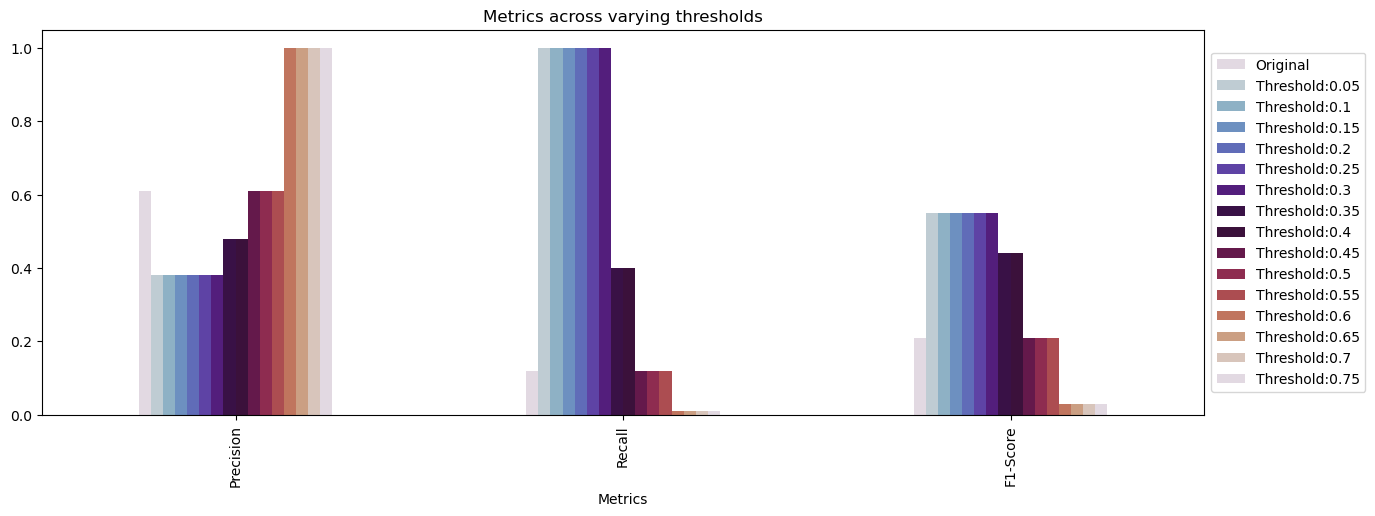

In [44]:
# Plotting the metrics
model3_adj_threshold.plot(x = 'Metrics',
                          kind = 'bar',
                          stacked = False,
                          title = 'Metrics across varying thresholds',
                          figsize = (15, 5),
                          cmap = 'twilight').legend(loc = 'center left', bbox_to_anchor = (1.0, 0.5))

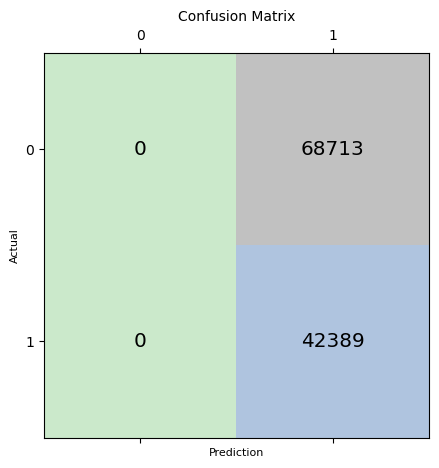

In [45]:
# Model prediction with threshold at 0.3
model3_pred_new_threshold = (model3.predict_proba(x_test)[:, 1] >= 0.3).astype(int)

# Confusion matrix
conf_matrix = confusion_matrix(y_true = y_test, y_pred = model3_pred_new_threshold)
fig, ax = plt.subplots(figsize = (5, 5))
ax.matshow(conf_matrix, cmap = plt.cm.Accent, alpha = 0.4)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x = j, y = i, s = conf_matrix[i, j],
                va = 'center', ha = 'center', size = 'x-large')

plt.xlabel('Prediction', fontsize = 8)
plt.ylabel('Actual', fontsize = 8)
plt.title('Confusion Matrix', fontsize = 10)
plt.show()

In [46]:
# Precision, Recall and F1-Score of new model prediction with optimal threshold
Precision_3_newthreshold = round(precision_score(y_test, model3_pred_new_threshold), 2)
Recall_3_newthreshold = round(recall_score(y_test, model3_pred_new_threshold), 2)
F1_Score_3_newthreshold = round(f1_score(y_test, model3_pred_new_threshold), 2)
Metrics_3_newthreshold = [Precision_3_newthreshold, Recall_3_newthreshold, F1_Score_3_newthreshold]

model3_newthreshold = pd.DataFrame(list(zip(Metrics_3, Metrics_3_newthreshold)))
model3_newthreshold.index = ['Precision', 'Recall', 'F1-Score']
model3_newthreshold.columns = ['Original Dataset', 'New Threshold Dataset']
model3_newthreshold

,Original Dataset,New Threshold Dataset
Precision,0.61,0.38
Recall,0.12,1.00
F1-Score,0.21,0.55


Over - sampling

In [47]:
# Model3 training on upsampled data
model3_ups = DecisionTreeClassifier(max_leaf_nodes = 5)
model3_ups.fit(x_train_ups, y_train_ups) # model training

# Model predictions on the test set
model3_ups_pred = model3_ups.predict(x_test_ups)

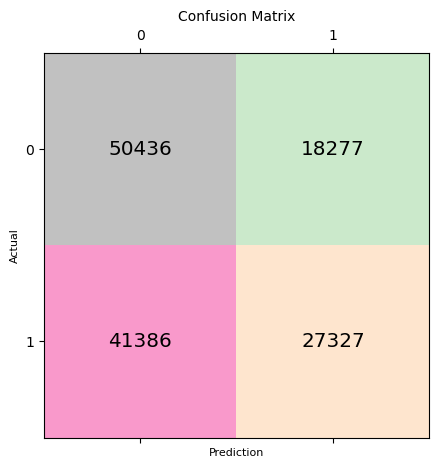

In [48]:
# Confusion matrix
conf_matrix = confusion_matrix(y_true = y_test_ups, y_pred = model3_ups_pred)
fig, ax = plt.subplots(figsize = (5, 5))
ax.matshow(conf_matrix, cmap = plt.cm.Accent, alpha = 0.4)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x = j, y = i, s = conf_matrix[i, j],
                va = 'center', ha = 'center', size = 'x-large')

plt.xlabel('Prediction', fontsize = 8)
plt.ylabel('Actual', fontsize = 8)
plt.title('Confusion Matrix', fontsize = 10)
plt.show()

In [49]:
# Model3 Precision, Recall and F1-Score on upsampled data
Precision_3_ups = round(precision_score(y_test_ups, model3_ups_pred), 2)
Recall_3_ups = round(recall_score(y_test_ups, model3_ups_pred), 2)
F1_Score_3_ups = round(f1_score(y_test_ups, model3_ups_pred), 2)
Metrics_3_ups = [Precision_3_ups, Recall_3_ups, F1_Score_3_ups]

up_sampled_3 = pd.DataFrame(list(zip(Metrics_3, Metrics_3_newthreshold, Metrics_3_ups)))
up_sampled_3.index = ['Precision', 'Recall', 'F1-Score']
up_sampled_3.columns = ['Original Dataset', 'Threshold = 0.3', 'Up-sampled Dataset']
up_sampled_3

,Original Dataset,Threshold = 0.3,Up-sampled Dataset
Precision,0.61,0.38,0.60
Recall,0.12,1.00,0.40
F1-Score,0.21,0.55,0.48


Under-sampling

In [50]:
# Model3 training on downsampled data
model3_down = DecisionTreeClassifier(max_leaf_nodes = 5)
model3_down.fit(x_train_und, y_train_und) # model training

# Model3 predictions on the test set
model3_down_pred = model3_down.predict(x_test_und)

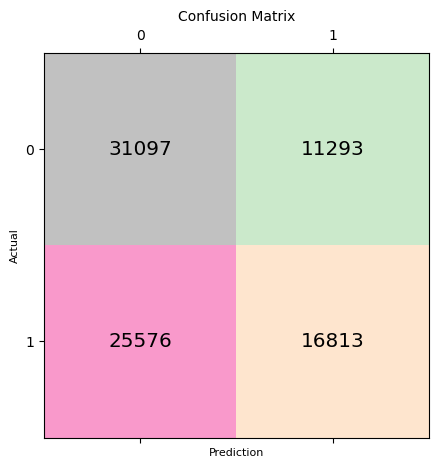

In [51]:
# Confusion matrix
conf_matrix = confusion_matrix(y_true = y_test_und, y_pred = model3_down_pred)
fig, ax = plt.subplots(figsize = (5, 5))
ax.matshow(conf_matrix, cmap = plt.cm.Accent, alpha = 0.4)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x = j, y = i, s = conf_matrix[i, j],
                va = 'center', ha = 'center', size = 'x-large')

plt.xlabel('Prediction', fontsize = 8)
plt.ylabel('Actual', fontsize = 8)
plt.title('Confusion Matrix', fontsize = 10)
plt.show()

In [52]:
# Model3 Precision, Recall and F1-Score on downsampled data
Precision_3_down = round(precision_score(y_test_und, model3_down_pred), 2)
Recall_3_down = round(recall_score(y_test_und, model3_down_pred), 2)
F1_Score_3_down = round(f1_score(y_test_und, model3_down_pred), 2)
Metrics_3_down = [Precision_3_down, Recall_3_down, F1_Score_3_down]

down_sampled_3 = pd.DataFrame(list(zip(Metrics_3, Metrics_3_newthreshold, Metrics_3_ups, Metrics_3_down)))
down_sampled_3.index = ['Precision', 'Recall', 'F1-Score']
down_sampled_3.columns = ['Original Dataset', 'Threshold = 0.3', 'Up-sampled Dataset', 'Under-sampled Dataset']
down_sampled_3

,Original Dataset,Threshold = 0.3,Up-sampled Dataset,Under-sampled Dataset
Precision,0.61,0.38,0.60,0.60
Recall,0.12,1.00,0.40,0.40
F1-Score,0.21,0.55,0.48,0.48


In [53]:
# model4 - XGBoost Classifier
# Importing XGBoost classifier library
from xgboost import XGBClassifier

# Build XGBoost classifier
model4 = XGBClassifier()

model4.fit(x_train, y_train) # model training

# Model predictions on the test set
model4_pred = model4.predict(x_test)

model4 accuracy on train set: 65.6%
model4 accuracy on test set: 64.9%


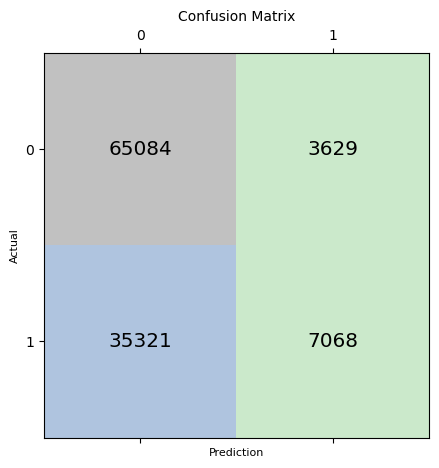

In [54]:
# XGBoost Classifier (model4) evaluation
# Checking the Model Accuracy and comparing it to Precision, Recall and F1_Score
print('model4 accuracy on train set: {:.1f}%'.format(round(accuracy_score(y_train, model4.predict(x_train))*100, 1)))
print('model4 accuracy on test set: {:.1f}%'.format(round(accuracy_score(y_test, model4_pred)*100, 1)))

# Confusion matrix
conf_matrix = confusion_matrix(y_true = y_test, y_pred = model4_pred)
fig, ax = plt.subplots(figsize = (5, 5))
ax.matshow(conf_matrix, cmap = plt.cm.Accent, alpha = 0.4)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x = j, y = i, s = conf_matrix[i, j],
                va = 'center', ha = 'center', size = 'x-large')

plt.xlabel('Prediction', fontsize = 8)
plt.ylabel('Actual', fontsize = 8)
plt.title('Confusion Matrix', fontsize = 10)
plt.show()

In [55]:
# Precision, Recall and F1-Score of XGBoost Classifier
Precision_4 = round(precision_score(y_test, model4_pred), 2)
Recall_4 = round(recall_score(y_test, model4_pred), 2)
F1_Score_4 = round(f1_score(y_test, model4_pred), 2)
Metrics_4 = [Precision_4, Recall_4, F1_Score_4]

Original_4 = pd.DataFrame(Metrics_4)
Original_4.index = ['Precision', 'Recall', 'F1-Score']
Original_4.columns = ['Original Dataset']
Original_4

,Original Dataset
Precision,0.66
Recall,0.17
F1-Score,0.27


Changing prediction threshold

In [56]:
cols = ['Metrics', 'Original']
model4_adj_threshold = pd.DataFrame()
model4_adj_threshold['Original'] = Metrics_4
thresholds = [j/20 for j in range(1, 16)]
for i in thresholds:
    model4_new_threshold = (model4.predict_proba(x_test)[:, 1] >= i).astype(int)
    Precision_4_adj_threshold = round(precision_score(y_test, model4_new_threshold, average = 'binary'), 2)
    Recall_4_adj_threshold = round(recall_score(y_test, model4_new_threshold, average = 'binary'), 2)
    F1_SCore_4_adj_threshold = round(f1_score(y_test, model4_new_threshold, average = 'binary'), 2)
    Metrics_4_adj_threshold = [Precision_4_adj_threshold, Recall_4_adj_threshold, F1_SCore_4_adj_threshold]
    name = 'Threshold:' + str(i)
    model4_adj_threshold[name] = Metrics_4_adj_threshold
    cols.append(name)

model4_adj_threshold.index = ['Precision', 'Recall', 'F1-Score']
model4_adj_threshold = model4_adj_threshold.reset_index()
model4_adj_threshold.columns = cols
model4_adj_threshold.transpose()

adj_threshold4 = model4_adj_threshold.transpose().iloc[1:, :]
adj_threshold4.columns = model4_adj_threshold.iloc[:, 0]
adj_threshold4

Metrics,Precision,Recall,F1-Score
Original,0.66,0.17,0.27
Threshold:0.05,0.38,1.0,0.55
Threshold:0.1,0.38,1.0,0.55
Threshold:0.15,0.38,1.0,0.55
Threshold:0.2,0.38,1.0,0.55
Threshold:0.25,0.39,0.97,0.56
Threshold:0.3,0.41,0.87,0.56
Threshold:0.35,0.44,0.7,0.54
Threshold:0.4,0.51,0.43,0.46
Threshold:0.45,0.6,0.24,0.34


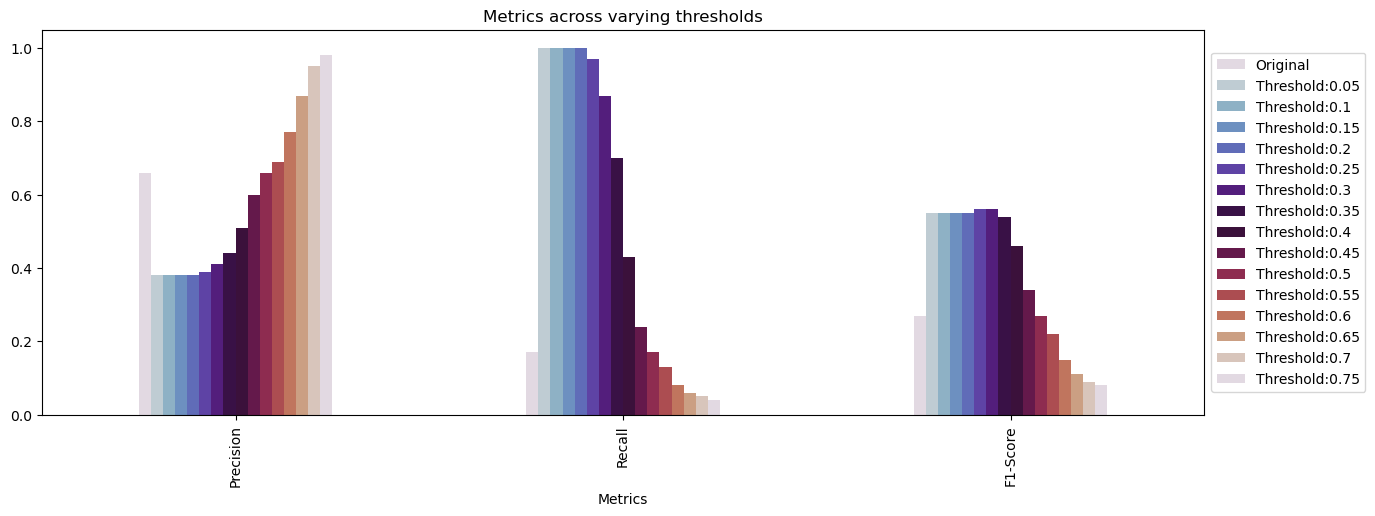

In [57]:
# Plotting the metrics
model4_adj_threshold.plot(x = 'Metrics',
                          kind = 'bar',
                          stacked = False,
                          title = 'Metrics across varying thresholds',
                          figsize = (15, 5),
                          cmap = 'twilight').legend(loc = 'center left', bbox_to_anchor = (1.0, 0.5))

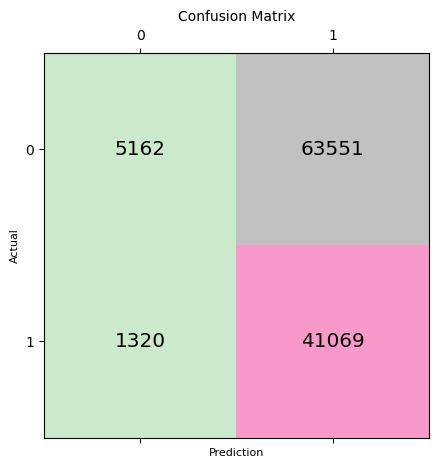

In [93]:
# Model4 prediction with threshold at 0.25
model4_pred_new_threshold = (model4.predict_proba(x_test)[:, 1] >= 0.25).astype(int)

# Confusion matrix
conf_matrix = confusion_matrix(y_true = y_test, y_pred = model4_pred_new_threshold)
fig, ax = plt.subplots(figsize = (5, 5))
ax.matshow(conf_matrix, cmap = plt.cm.Accent, alpha = 0.4)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x = j, y = i, s = conf_matrix[i, j],
                va = 'center', ha = 'center', size = 'x-large')

plt.xlabel('Prediction', fontsize = 8)
plt.ylabel('Actual', fontsize = 8)
plt.title('Confusion Matrix', fontsize = 10)
plt.show()

In [94]:
# Precision, Recall and F1-Score of new model prediction with optimal threshold
Precision_4_newthreshold = round(precision_score(y_test, model4_pred_new_threshold), 2)
Recall_4_newthreshold = round(recall_score(y_test, model4_pred_new_threshold), 2)
F1_Score_4_newthreshold = round(f1_score(y_test, model4_pred_new_threshold), 2)
Metrics_4_newthreshold = [Precision_4_newthreshold, Recall_4_newthreshold, F1_Score_4_newthreshold]

model4_newthreshold = pd.DataFrame(list(zip(Metrics_4, Metrics_4_newthreshold)))
model4_newthreshold.index = ['Precision', 'Recall', 'F1-Score']
model4_newthreshold.columns = ['Original Dataset', 'New Threshold Dataset']
model4_newthreshold

,Original Dataset,New Threshold Dataset
Precision,0.66,0.39
Recall,0.17,0.97
F1-Score,0.27,0.56


Over-sampling

In [61]:
# Model4 training on upsampled data
model4_ups = XGBClassifier()
model4_ups.fit(x_train_ups, y_train_ups) # model training

# Model4 predictions on the test set
model4_ups_pred = model4_ups.predict(x_test_ups)

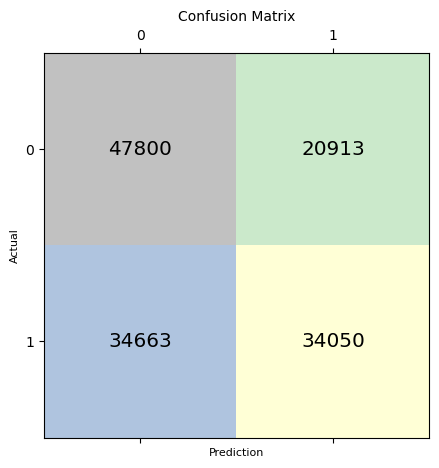

In [62]:
# Confusion matrix
conf_matrix = confusion_matrix(y_true = y_test_ups, y_pred = model4_ups_pred)
fig, ax = plt.subplots(figsize = (5, 5))
ax.matshow(conf_matrix, cmap = plt.cm.Accent, alpha = 0.4)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x = j, y = i, s = conf_matrix[i, j],
                va = 'center', ha = 'center', size = 'x-large')

plt.xlabel('Prediction', fontsize = 8)
plt.ylabel('Actual', fontsize = 8)
plt.title('Confusion Matrix', fontsize = 10)
plt.show()

In [95]:
# Model4 Precision, Recall and F1-Score on upsampled data
Precision_4_ups = round(precision_score(y_test_ups, model4_ups_pred), 2)
Recall_4_ups = round(recall_score(y_test_ups, model4_ups_pred), 2)
F1_Score_4_ups = round(f1_score(y_test_ups, model4_ups_pred), 2)
Metrics_4_ups = [Precision_4_ups, Recall_4_ups, F1_Score_4_ups]

up_sampled_4 = pd.DataFrame(list(zip(Metrics_4, Metrics_4_newthreshold, Metrics_4_ups)))
up_sampled_4.index = ['Precision', 'Recall', 'F1-Score']
up_sampled_4.columns = ['Original Dataset', 'Threshold = 0.3','Up-sampled Dataset']
up_sampled_4

,Original Dataset,Threshold = 0.3,Up-sampled Dataset
Precision,0.66,0.39,0.62
Recall,0.17,0.97,0.50
F1-Score,0.27,0.56,0.55


Under-sampling

In [64]:
# Model4 training on downsampled data
model4_down = XGBClassifier()
model4_down.fit(x_train_und, y_train_und) # model training

# Model predictions on the test set
model4_down_pred = model4_down.predict(x_test_und)

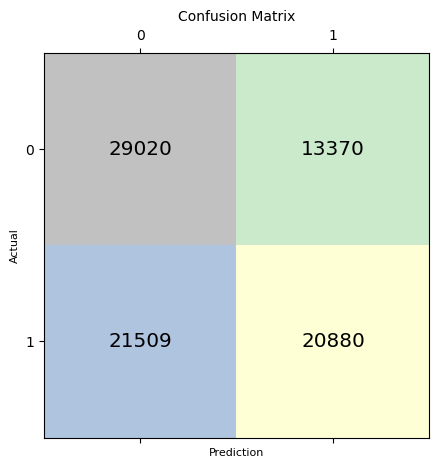

In [65]:
# Confusion matrix
conf_matrix = confusion_matrix(y_true = y_test_und, y_pred = model4_down_pred)
fig, ax = plt.subplots(figsize = (5, 5))
ax.matshow(conf_matrix, cmap = plt.cm.Accent, alpha = 0.4)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x = j, y = i, s = conf_matrix[i, j],
                va = 'center', ha = 'center', size = 'x-large')

plt.xlabel('Prediction', fontsize = 8)
plt.ylabel('Actual', fontsize = 8)
plt.title('Confusion Matrix', fontsize = 10)
plt.show()

In [96]:
# Model4 Precision, Recall and F1-Score on downsampled data
Precision_4_down = round(precision_score(y_test_und, model4_down_pred), 2)
Recall_4_down = round(recall_score(y_test_und, model4_down_pred), 2)
F1_Score_4_down = round(f1_score(y_test_und, model4_down_pred), 2)
Metrics_4_down = [Precision_4_down, Recall_4_down, F1_Score_4_down]

down_sampled_4 = pd.DataFrame(list(zip(Metrics_4, Metrics_4_newthreshold, Metrics_4_ups, Metrics_4_down)))
down_sampled_4.index = ['Precision', 'Recall', 'F1-Score']
down_sampled_4.columns = ['Original Dataset', 'Threshold = 0.3','Up-sampled Dataset', 'Under-sampled Dataset']
down_sampled_4

,Original Dataset,Threshold = 0.3,Up-sampled Dataset,Under-sampled Dataset
Precision,0.66,0.39,0.62,0.61
Recall,0.17,0.97,0.50,0.49
F1-Score,0.27,0.56,0.55,0.54


In [97]:
# model5 - Deep Multi-Layer Perceptron (MLP) model
# Importing tensorflow library
import tensorflow as tf

# Defining the deep multi-layer perceptron model with 2 hidden layers of 128 and 64 neurons respectively
# Added a droupout layer of 20% to help prevent overfitting
def deep_MLP_model(input_dim):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(128, activation = 'relu', input_dim = input_dim), # first hidden layer
        tf.keras.layers.Dropout(0.2), # dropout later
        tf.keras.layers.Dense(64, activation = 'relu'), # 2nd hidden layer
        tf.keras.layers.Dense(1, activation = 'sigmoid') # output layer
    ])

    # Compile the model
    model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

# Building the deep multi-layer perceptron model
model5 = deep_MLP_model(input_dim = x_train.shape[1])

# Model training
# setting early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = tf.keras.callbacks.EarlyStopping(patience = 3)
model5.fit(x_train, y_train, epochs = 10, 
           batch_size = 32, validation_split = 0.2,
           callbacks = [early_stopping_monitor])

# Model predictions on the test set
model5_pred = (model5.predict(x_test) > 0.5).astype(int).flatten()

Epoch 1/10
11111/11111 [==============================] - 66s 6ms/step - loss: 0.6399 - accuracy: 0.6428 - val_loss: 0.6399 - val_accuracy: 0.6431
Epoch 2/10
11111/11111 [==============================] - 59s 5ms/step - loss: 0.6375 - accuracy: 0.6448 - val_loss: 0.6390 - val_accuracy: 0.6431
Epoch 3/10
11111/11111 [==============================] - 58s 5ms/step - loss: 0.6371 - accuracy: 0.6450 - val_loss: 0.6391 - val_accuracy: 0.6431
Epoch 4/10
11111/11111 [==============================] - 56s 5ms/step - loss: 0.6368 - accuracy: 0.6451 - val_loss: 0.6389 - val_accuracy: 0.6425
Epoch 5/10
11111/11111 [==============================] - 52s 5ms/step - loss: 0.6366 - accuracy: 0.6450 - val_loss: 0.6392 - val_accuracy: 0.6431
Epoch 6/10
11111/11111 [==============================] - 49s 4ms/step - loss: 0.6365 - accuracy: 0.6452 - val_loss: 0.6392 - val_accuracy: 0.6431
Epoch 7/10
3472/3472 [==============================] - 6s 2ms/step


13888/13888 [==============================] - 23s 2ms/step
model5 accuracy on train set: 64.5%
model5 accuracy on test set: 64.5%


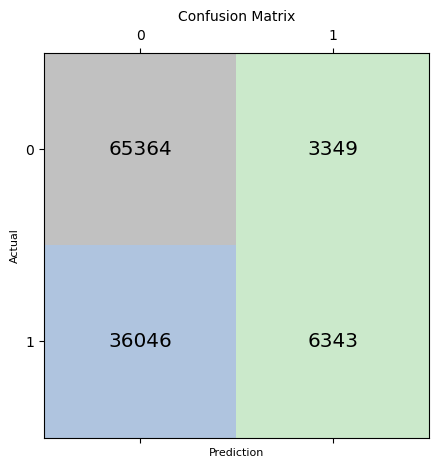

In [98]:
# Deep MLP (model5) evaluation
# Checking the Model Accuracy and comparing it to Precision, Recall and F1_Score
print('model5 accuracy on train set: {:.1f}%'.format(round(accuracy_score(y_train, (model5.predict(x_train) > 0.5).astype(int).flatten())*100, 1)))
print('model5 accuracy on test set: {:.1f}%'.format(round(accuracy_score(y_test, model5_pred)*100, 1)))

# Confusion matrix
conf_matrix = confusion_matrix(y_true = y_test, y_pred = model5_pred)
fig, ax = plt.subplots(figsize = (5, 5))
ax.matshow(conf_matrix, cmap = plt.cm.Accent, alpha = 0.4)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x = j, y = i, s = conf_matrix[i, j],
                va = 'center', ha = 'center', size = 'x-large')

plt.xlabel('Prediction', fontsize = 8)
plt.ylabel('Actual', fontsize = 8)
plt.title('Confusion Matrix', fontsize = 10)
plt.show()

In [99]:
# Precision, Recall and F1-Score of Deep MLP Model
Precision_5 = round(precision_score(y_test, model5_pred), 2)
Recall_5 = round(recall_score(y_test, model5_pred), 2)
F1_Score_5 = round(f1_score(y_test, model5_pred), 2)
Metrics_5 = [Precision_5, Recall_5, F1_Score_5]

Original_5 = pd.DataFrame(Metrics_5)
Original_5.index = ['Precision', 'Recall', 'F1-Score']
Original_5.columns = ['Original Dataset']
Original_5

,Original Dataset
Precision,0.65
Recall,0.15
F1-Score,0.24


Changing prediction threshold

In [100]:
cols = ['Metrics', 'Original']
model5_adj_threshold = pd.DataFrame()
model5_adj_threshold['Original'] = Metrics_5
thresholds = [j/20 for j in range(1, 16)]
for i in thresholds:
    model5_probabilities = model5.predict(x_test)
    model5_new_threshold = (model5_probabilities >= i).astype(int)
    Precision_5_adj_threshold = round(precision_score(y_test, model5_new_threshold, average = 'binary'), 2)
    Recall_5_adj_threshold = round(recall_score(y_test, model5_new_threshold, average = 'binary'), 2)
    F1_SCore_5_adj_threshold = round(f1_score(y_test, model5_new_threshold, average = 'binary'), 2)
    Metrics_5_adj_threshold = [Precision_5_adj_threshold, Recall_5_adj_threshold, F1_SCore_5_adj_threshold]
    name = 'Threshold:' + str(i)
    model5_adj_threshold[name] = Metrics_5_adj_threshold
    cols.append(name)

model5_adj_threshold.index = ['Precision', 'Recall', 'F1-Score']
model5_adj_threshold = model5_adj_threshold.reset_index()
model5_adj_threshold.columns = cols
model5_adj_threshold.transpose()

adj_threshold5 = model5_adj_threshold.transpose().iloc[1:, :]
adj_threshold5.columns = model5_adj_threshold.iloc[:, 0]
adj_threshold5

3472/3472 [==============================] - 6s 2ms/step


Metrics,Precision,Recall,F1-Score
Original,0.65,0.15,0.24
Threshold:0.05,0.38,1.0,0.55
Threshold:0.1,0.38,1.0,0.55
Threshold:0.15,0.38,1.0,0.55
Threshold:0.2,0.38,1.0,0.55
Threshold:0.25,0.39,0.98,0.56
Threshold:0.3,0.41,0.89,0.56
Threshold:0.35,0.42,0.75,0.54
Threshold:0.4,0.49,0.43,0.46
Threshold:0.45,0.58,0.21,0.3


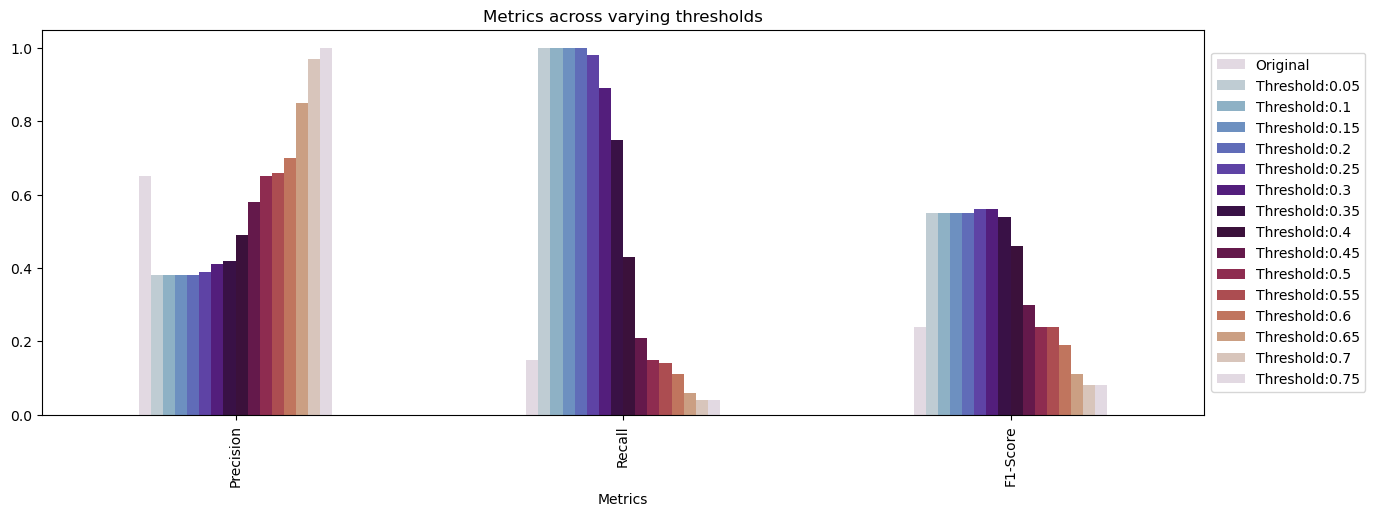

In [101]:
# Plotting the metrics
model5_adj_threshold.plot(x = 'Metrics',
                          kind = 'bar',
                          stacked = False,
                          title = 'Metrics across varying thresholds',
                          figsize = (15, 5),
                          cmap = 'twilight').legend(loc = 'center left', bbox_to_anchor = (1.0, 0.5))

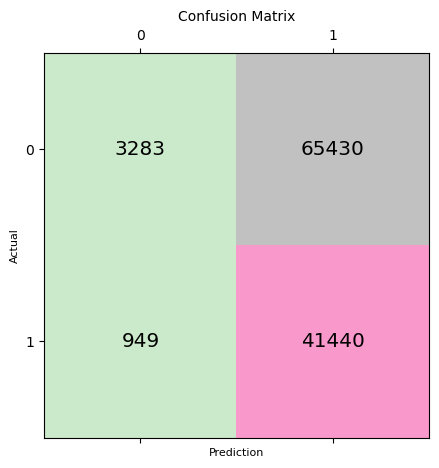

In [102]:
# Model prediction with threshold at 0.25
model5_pred_new_threshold = (model5_probabilities >= 0.25).astype(int)

# Confusion matrix
conf_matrix = confusion_matrix(y_true = y_test, y_pred = model5_pred_new_threshold)
fig, ax = plt.subplots(figsize = (5, 5))
ax.matshow(conf_matrix, cmap = plt.cm.Accent, alpha = 0.4)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x = j, y = i, s = conf_matrix[i, j],
                va = 'center', ha = 'center', size = 'x-large')

plt.xlabel('Prediction', fontsize = 8)
plt.ylabel('Actual', fontsize = 8)
plt.title('Confusion Matrix', fontsize = 10)
plt.show()

In [103]:
# Precision, Recall and F1-Score of new model prediction with optimal threshold
Precision_5_newthreshold = round(precision_score(y_test, model5_pred_new_threshold), 2)
Recall_5_newthreshold = round(recall_score(y_test, model5_pred_new_threshold), 2)
F1_Score_5_newthreshold = round(f1_score(y_test, model5_pred_new_threshold), 2)
Metrics_5_newthreshold = [Precision_5_newthreshold, Recall_5_newthreshold, F1_Score_5_newthreshold]

model5_newthreshold = pd.DataFrame(list(zip(Metrics_5, Metrics_5_newthreshold)))
model5_newthreshold.index = ['Precision', 'Recall', 'F1-Score']
model5_newthreshold.columns = ['Original Dataset', 'New Threshold Dataset']
model5_newthreshold

,Original Dataset,New Threshold Dataset
Precision,0.65,0.39
Recall,0.15,0.98
F1-Score,0.24,0.56


Over-sampling

In [104]:
# Model training on upsampled data
# Building the deep multi-layer perceptron model
model5_ups = deep_MLP_model(input_dim = x_train_ups.shape[1])

# Model training
# setting early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = tf.keras.callbacks.EarlyStopping(patience = 3)
model5_ups.fit(x_train_ups, y_train_ups, epochs = 10, 
               batch_size = 32, validation_split = 0.2,
               callbacks = [early_stopping_monitor])

# Model predictions on the test set
model5_ups_pred = (model5_ups.predict(x_test_ups) > 0.5).astype(int).flatten()

Epoch 1/10
13743/13743 [==============================] - 45s 3ms/step - loss: 0.6682 - accuracy: 0.5693 - val_loss: 0.6655 - val_accuracy: 0.5741
Epoch 2/10
13743/13743 [==============================] - 38s 3ms/step - loss: 0.6662 - accuracy: 0.5730 - val_loss: 0.6653 - val_accuracy: 0.5748
Epoch 3/10
13743/13743 [==============================] - 39s 3ms/step - loss: 0.6658 - accuracy: 0.5737 - val_loss: 0.6649 - val_accuracy: 0.5753
Epoch 4/10
13743/13743 [==============================] - 40s 3ms/step - loss: 0.6654 - accuracy: 0.5740 - val_loss: 0.6647 - val_accuracy: 0.5753
Epoch 5/10
13743/13743 [==============================] - 38s 3ms/step - loss: 0.6650 - accuracy: 0.5742 - val_loss: 0.6641 - val_accuracy: 0.5759
Epoch 6/10
13743/13743 [==============================] - 39s 3ms/step - loss: 0.6648 - accuracy: 0.5746 - val_loss: 0.6641 - val_accuracy: 0.5759
Epoch 7/10
13743/13743 [==============================] - 40s 3ms/step - loss: 0.6644 - accuracy: 0.5749 - val_loss: 0

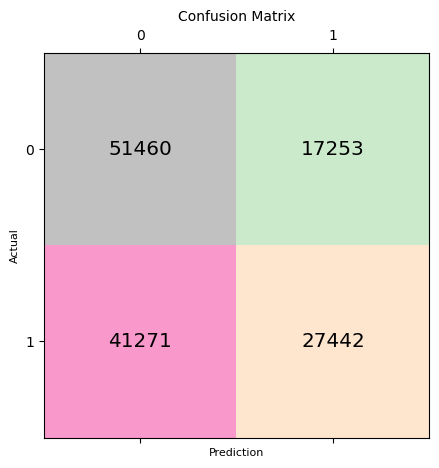

In [105]:
# Confusion matrix
conf_matrix = confusion_matrix(y_true = y_test_ups, y_pred = model5_ups_pred)
fig, ax = plt.subplots(figsize = (5, 5))
ax.matshow(conf_matrix, cmap = plt.cm.Accent, alpha = 0.4)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x = j, y = i, s = conf_matrix[i, j],
                va = 'center', ha = 'center', size = 'x-large')

plt.xlabel('Prediction', fontsize = 8)
plt.ylabel('Actual', fontsize = 8)
plt.title('Confusion Matrix', fontsize = 10)
plt.show()

In [106]:
# Model5 Precision, Recall and F1-Score on upsampled data
Precision_5_ups = round(precision_score(y_test_ups, model5_ups_pred), 2)
Recall_5_ups = round(recall_score(y_test_ups, model5_ups_pred), 2)
F1_Score_5_ups = round(f1_score(y_test_ups, model5_ups_pred), 2)
Metrics_5_ups = [Precision_5_ups, Recall_5_ups, F1_Score_5_ups]

up_sampled_5 = pd.DataFrame(list(zip(Metrics_5, Metrics_5_newthreshold, Metrics_5_ups)))
up_sampled_5.index = ['Precision', 'Recall', 'F1-Score']
up_sampled_5.columns = ['Original Dataset', 'Threshold = 0.25','Up-sampled Dataset']
up_sampled_5

,Original Dataset,Threshold = 0.25,Up-sampled Dataset
Precision,0.65,0.39,0.61
Recall,0.15,0.98,0.40
F1-Score,0.24,0.56,0.48


Under-sampling

In [107]:
# Model training on undersampled data
# Building the deep multi-layer perceptron model
model5_down = deep_MLP_model(input_dim = x_train_und.shape[1])

# Model training
# setting early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = tf.keras.callbacks.EarlyStopping(patience = 3)
model5_down.fit(x_train_und, y_train_und, epochs = 10, 
                batch_size = 32, validation_split = 0.2,
                callbacks = [early_stopping_monitor])

# Model predictions on the test set
model5_down_pred = (model5_down.predict(x_test_und) > 0.5).astype(int).flatten()

Epoch 1/10
8478/8478 [==============================] - 26s 3ms/step - loss: 0.6689 - accuracy: 0.5665 - val_loss: 0.6651 - val_accuracy: 0.5722
Epoch 2/10
8478/8478 [==============================] - 24s 3ms/step - loss: 0.6661 - accuracy: 0.5722 - val_loss: 0.6653 - val_accuracy: 0.5719
Epoch 3/10
8478/8478 [==============================] - 24s 3ms/step - loss: 0.6656 - accuracy: 0.5729 - val_loss: 0.6650 - val_accuracy: 0.5717
Epoch 4/10
8478/8478 [==============================] - 25s 3ms/step - loss: 0.6655 - accuracy: 0.5732 - val_loss: 0.6647 - val_accuracy: 0.5736
Epoch 5/10
8478/8478 [==============================] - 24s 3ms/step - loss: 0.6651 - accuracy: 0.5732 - val_loss: 0.6646 - val_accuracy: 0.5728
Epoch 6/10
8478/8478 [==============================] - 25s 3ms/step - loss: 0.6649 - accuracy: 0.5739 - val_loss: 0.6649 - val_accuracy: 0.5733
Epoch 7/10
8478/8478 [==============================] - 25s 3ms/step - loss: 0.6643 - accuracy: 0.5745 - val_loss: 0.6645 - val_ac

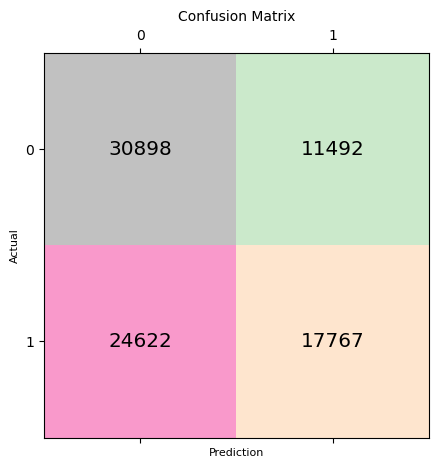

In [108]:
# Confusion matrix
conf_matrix = confusion_matrix(y_true = y_test_und, y_pred = model5_down_pred)
fig, ax = plt.subplots(figsize = (5, 5))
ax.matshow(conf_matrix, cmap = plt.cm.Accent, alpha = 0.4)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x = j, y = i, s = conf_matrix[i, j],
                va = 'center', ha = 'center', size = 'x-large')

plt.xlabel('Prediction', fontsize = 8)
plt.ylabel('Actual', fontsize = 8)
plt.title('Confusion Matrix', fontsize = 10)
plt.show()

In [109]:
# Model5 Precision, Recall and F1-Score on downsampled data
Precision_5_down = round(precision_score(y_test_und, model5_down_pred), 2)
Recall_5_down = round(recall_score(y_test_und, model5_down_pred), 2)
F1_Score_5_down = round(f1_score(y_test_und, model5_down_pred), 2)
Metrics_5_down = [Precision_5_down, Recall_5_down, F1_Score_5_down]

down_sampled_5 = pd.DataFrame(list(zip(Metrics_5, Metrics_5_newthreshold, Metrics_5_ups, Metrics_5_down)))
down_sampled_5.index = ['Precision', 'Recall', 'F1-Score']
down_sampled_5.columns = ['Original Dataset', 'Threshold = 0.25','Up-sampled Dataset', 'Under-sampled Dataset']
down_sampled_5

,Original Dataset,Threshold = 0.25,Up-sampled Dataset,Under-sampled Dataset
Precision,0.65,0.39,0.61,0.61
Recall,0.15,0.98,0.40,0.42
F1-Score,0.24,0.56,0.48,0.50


In [112]:
# Saving the best performing model
# XGBoost classifier (model4) was the best performing machine learning model for this problem
# import pickle library for saving the model
import pickle
with open('C:/Isaac/trained_xgb_model.sav', 'wb') as file:
    pickle.dump(model4, file)